In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


In [2]:
df_train = pd.read_csv("/kaggle/input/heartbeat/mitbih_train.csv", header=None)
df_test = pd.read_csv("/kaggle/input/heartbeat/mitbih_test.csv", header=None)

In [3]:
df_train.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87553,0.901506,0.845886,0.800695,0.748552,0.687138,0.599073,0.512167,0.427578,0.395133,0.402086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [4]:
df_test.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21891,0.973970,0.913232,0.865510,0.823210,0.746204,0.642082,0.547722,0.426247,0.325380,0.279826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [5]:
df_train.shape

(87554, 188)

In [6]:
df_test.shape

(21892, 188)

In [7]:
df= pd.concat([df_train,df_test],ignore_index=True,sort=False)

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109441,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109442,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109443,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109444,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109446 entries, 0 to 109445
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 157.0 MB


In [10]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,...,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000
mean,0.891170,0.758909,0.424503,0.219602,0.201237,0.210298,0.205607,0.201617,0.198480,0.196610,...,0.004937,0.004568,0.004237,0.003914,0.003673,0.003469,0.003210,0.002956,0.002835,0.473439
std,0.239657,0.221190,0.227561,0.207248,0.177191,0.171965,0.178374,0.177020,0.171469,0.168028,...,0.043951,0.042109,0.040471,0.038801,0.037465,0.036552,0.035015,0.033413,0.032620,1.143232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922252,0.682648,0.251014,0.048853,0.082418,0.088300,0.073171,0.066093,0.064893,0.068615,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991202,0.826560,0.430174,0.166355,0.147842,0.158640,0.145078,0.144465,0.150073,0.148849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910868,0.579832,0.342707,0.259045,0.287500,0.298343,0.295235,0.290623,0.283465,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [11]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.776378,0.142675,-0.130667,-0.239685,-0.349050,-0.427408,-0.477762,-0.519645,-0.558296,...,-0.053454,-0.047539,-0.041829,-0.038567,-0.038517,-0.039591,-0.038347,-0.036757,-0.035826,-0.165686
1,0.776378,1.000000,0.504394,-0.019387,-0.143028,-0.159431,-0.229313,-0.281413,-0.319116,-0.338422,...,-0.021273,-0.016822,-0.012181,-0.010962,-0.011727,-0.013761,-0.012656,-0.012080,-0.012032,-0.181527
2,0.142675,0.504394,1.000000,0.674551,0.405695,0.347719,0.281982,0.206044,0.137553,0.075984,...,-0.019619,-0.021688,-0.023067,-0.027023,-0.029662,-0.031110,-0.031320,-0.032764,-0.034089,0.254649
3,-0.130667,-0.019387,0.674551,1.000000,0.820441,0.596377,0.474315,0.386567,0.289277,0.195681,...,-0.019088,-0.025189,-0.030843,-0.037572,-0.041533,-0.042543,-0.042900,-0.044553,-0.045436,0.509595
4,-0.239685,-0.143028,0.405695,0.820441,1.000000,0.881717,0.750069,0.662476,0.560822,0.445250,...,0.017078,0.008731,0.000371,-0.008441,-0.013908,-0.015925,-0.017221,-0.020801,-0.021703,0.509321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,-0.039591,-0.013761,-0.031110,-0.042543,-0.015925,0.005693,0.006009,0.016363,0.024172,0.017949,...,0.747677,0.789429,0.839449,0.899827,0.960228,1.000000,0.947804,0.888950,0.854775,0.037439
184,-0.038347,-0.012656,-0.031320,-0.042900,-0.017221,0.003328,0.003494,0.013962,0.022347,0.015879,...,0.717941,0.754616,0.797072,0.845807,0.899384,0.947804,1.000000,0.950379,0.910361,0.037801
185,-0.036757,-0.012080,-0.032764,-0.044553,-0.020801,-0.001064,-0.000439,0.010669,0.020025,0.013493,...,0.695258,0.726812,0.764176,0.806033,0.848494,0.888950,0.950379,1.000000,0.969127,0.037403
186,-0.035826,-0.012032,-0.034089,-0.045436,-0.021703,-0.002450,-0.001696,0.009803,0.019711,0.013236,...,0.683091,0.712380,0.746616,0.783789,0.822067,0.854775,0.910361,0.969127,1.000000,0.036807


In [12]:
df[187].value_counts()

0.0    90589
4.0     8039
2.0     7236
1.0     2779
3.0      803
Name: 187, dtype: int64

class distribution


<AxesSubplot:>

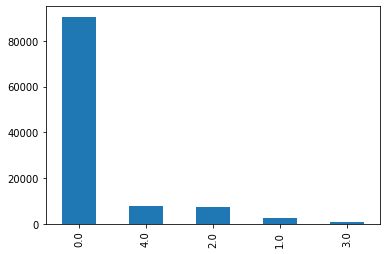

In [13]:
print('class distribution')
df[187].value_counts().plot(kind='bar')

In [14]:
df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [15]:
df.isnull().sum().sum()

0

There are 5 classes
Normal beat ('N'): 0
Supraventricular ectopic beats ('S'): 1
Ventricular ectopic beats ('V'): 2
Fusion Beats ('F'): 3
Unknown Beats ('Q'): 4

In [16]:
label = ["Normal Beat (N:0)",
         "Supraventricular (S:1)",
         "Ventricular (V:2)",
         "Fusion (F:3)",
         "Unknown (Q:4)"]

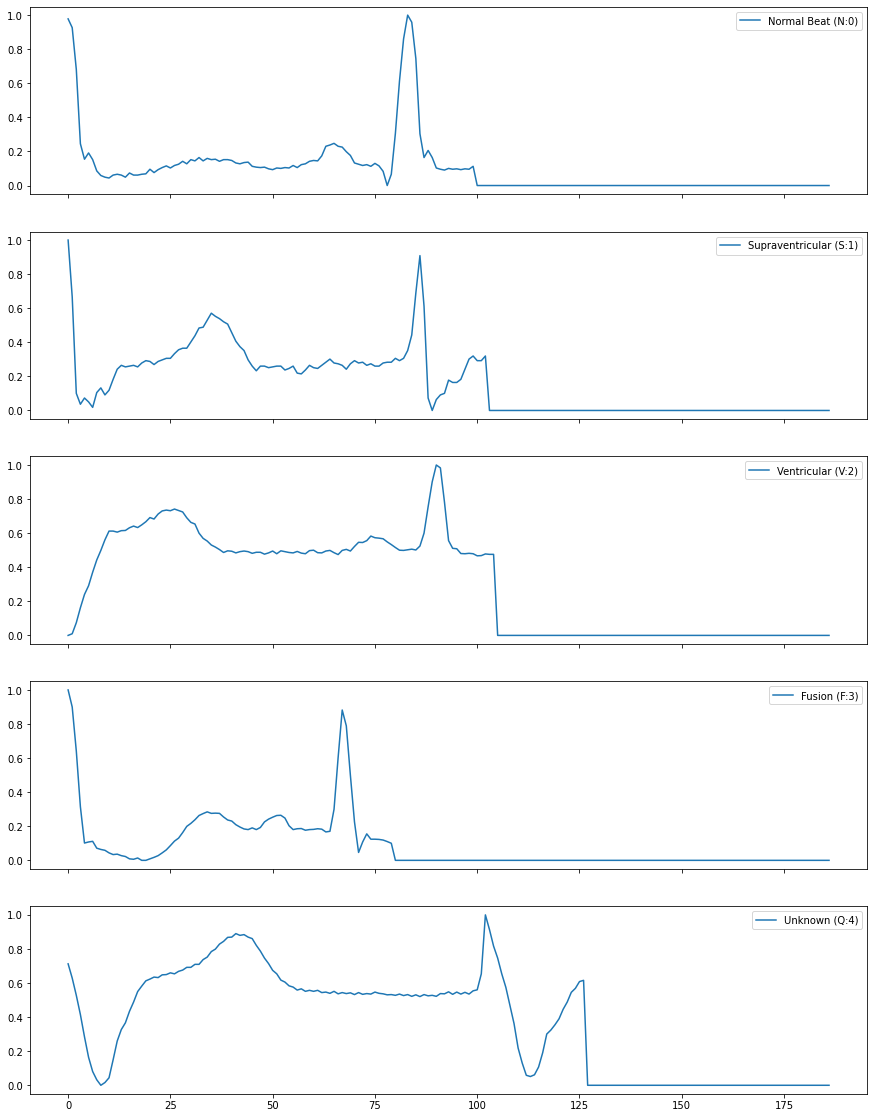

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(5, 1, sharex=True, sharey=True,figsize=(15,20))
for i, row in enumerate(ax):
    row.plot((df[df[187] == i].iloc[0])[:-1], label=label[i])
    row.legend()

<AxesSubplot:>

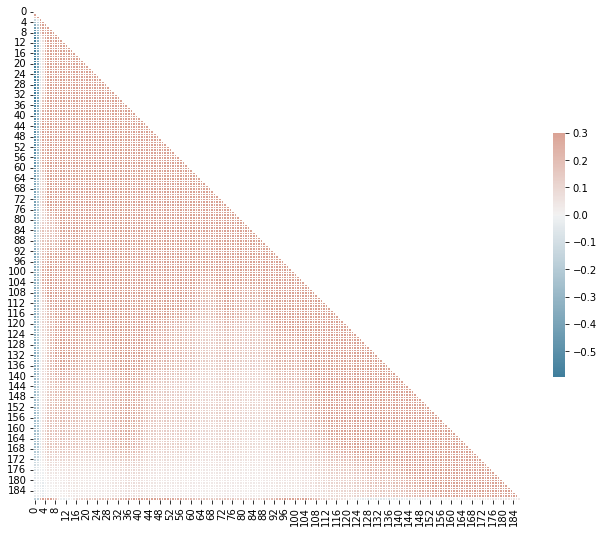

In [18]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [20]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

In [22]:
y_train.value_counts()

0.0    63493
4.0     5546
2.0     5075
1.0     1927
3.0      571
Name: 187, dtype: int64

# **Unbalanced class distribution.**Hence we need to resample.</br>
We use SMOTE </br>
*SMOTE: Synthetic Minority Over-sampling Technique*


In [23]:
import imblearn
from imblearn.over_sampling import SMOTE

In [24]:
smote=SMOTE()
X_oversampled,y_oversampled=smote.fit_resample(X_train,y_train)

In [25]:
y_oversampled.value_counts()

0.0    63493
4.0    63493
1.0    63493
2.0    63493
3.0    63493
Name: 187, dtype: int64

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(76612, 187)
(76612,)
(32834, 187)
(32834,)


In [27]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(256,activation='relu',input_dim=187))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

2022-11-20 15:34:15.071424: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               48128     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 89,605
Trainable params: 89,605
Non-trainable params: 0
_________________________________________________________________


In [29]:
##from ann_visualizer.visualize import ann_viz;
##ann_viz(model, title="ANN Visualized")

In [30]:
history=model.fit(X_train,y_train,epochs=50,validation_split=0.2,batch_size=64)

2022-11-20 15:34:15.427440: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
958/958 [==============================] - 5s 5ms/step - loss: 0.2507 - accuracy: 0.9298 - val_loss: 0.1581 - val_accuracy: 0.9558
Epoch 2/50
958/958 [==============================] - 5s 5ms/step - loss: 0.1466 - accuracy: 0.9587 - val_loss: 0.1333 - val_accuracy: 0.9619
Epoch 3/50
958/958 [==============================] - 5s 5ms/step - loss: 0.1237 - accuracy: 0.9649 - val_loss: 0.1193 - val_accuracy: 0.9633
Epoch 4/50
958/958 [==============================] - 4s 5ms/step - loss: 0.1107 - accuracy: 0.9683 - val_loss: 0.1021 - val_accuracy: 0.9708
Epoch 5/50
958/958 [==============================] - 4s 4ms/step - loss: 0.0963 - accuracy: 0.9723 - val_loss: 0.0968 - val_accuracy: 0.9737
Epoch 6/50
958/958 [==============================] - 5s 5ms/step - loss: 0.0893 - accuracy: 0.9738 - val_loss: 0.0985 - val_accuracy: 0.9736
Epoch 7/50
958/958 [==============================] - 4s 4ms/step - loss: 0.0824 - accuracy: 0.9755 - val_loss: 0.1014 - val_accuracy: 0.9726
Epoch 

In [31]:
y_=model.predict(X_test)
y_pred=np.argmax(y_,axis=1)

In [32]:
y_pred

array([0, 4, 0, ..., 0, 0, 0])

In [33]:
print("Accuracy with ANN is:", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy with ANN is: 0.9785588109886094
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     27096
         1.0       0.78      0.79      0.78       852
         2.0       0.94      0.95      0.95      2161
         3.0       0.81      0.74      0.77       232
         4.0       0.98      0.98      0.98      2493

    accuracy                           0.98     32834
   macro avg       0.90      0.89      0.89     32834
weighted avg       0.98      0.98      0.98     32834



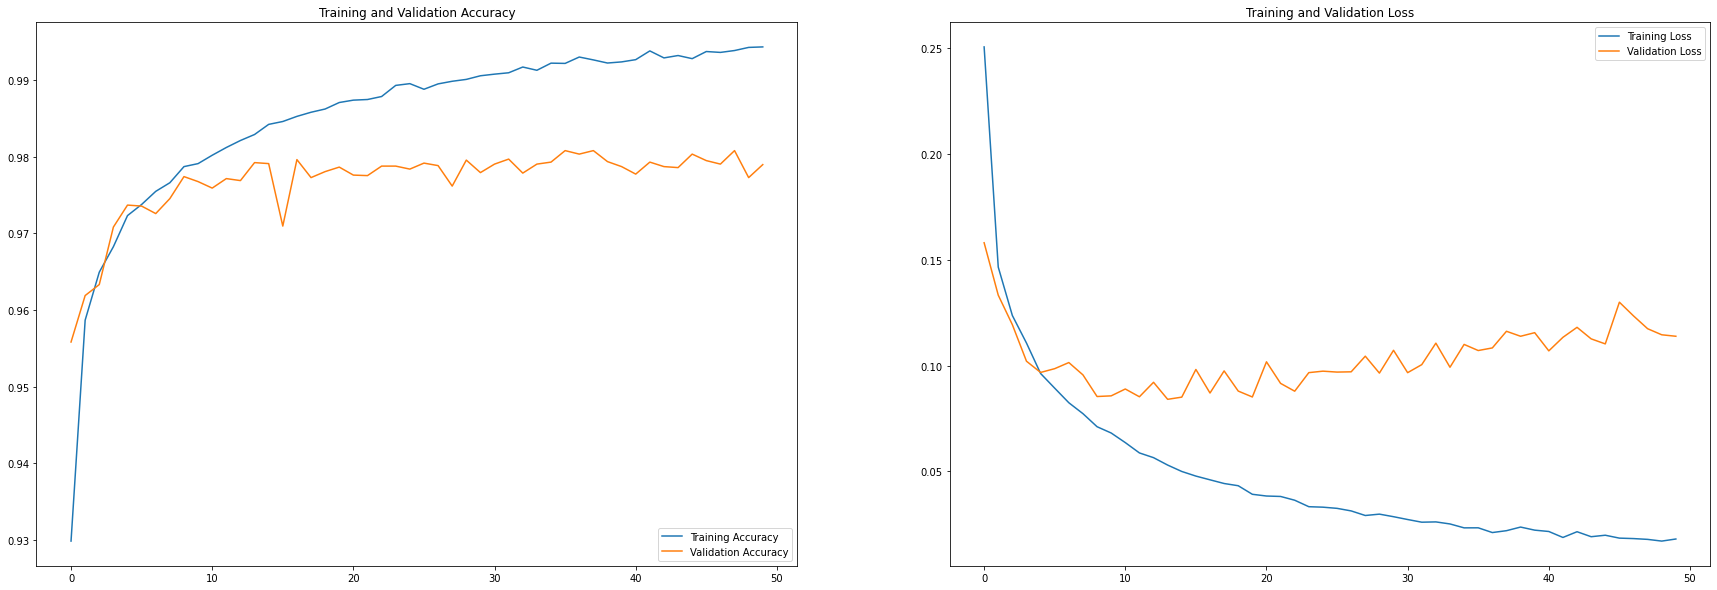

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[26786   181    81    20    28]
 [  168   669    12     2     1]
 [   75     6  2052    18    10]
 [   35     1    22   172     2]
 [   30     3     9     0  2451]]


In [36]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(12, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

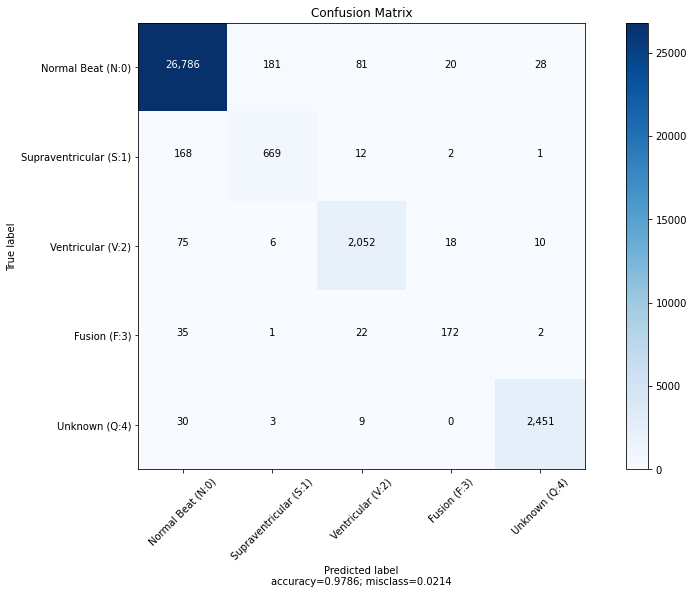

In [37]:
plot_confusion_matrix(cf_matrix,
                      normalize    = False,
                      target_names = ["Normal Beat (N:0)",
                                         "Supraventricular (S:1)",
                                         "Ventricular (V:2)",
                                         "Fusion (F:3)",
                                         "Unknown (Q:4)"],
                      title        = "Confusion Matrix")